# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
# Added suppression of FutureWarning message if this was Production Code would need to fix #
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# End Suppression code block 
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import numpy as np
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
crypto_assets={}
crypto_assets["BTC"]=1.2
crypto_assets["ETH"]=5.3
my_btc=crypto_assets["BTC"]
my_eth=crypto_assets["ETH"]

In [4]:
# Crypto API URLs
#btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
#eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
get_btc=requests.get(btc_url).json()
# Fetch current ETH price
# YOUR CODE HERE!
get_eth=requests.get(eth_url).json()


In [6]:
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value=get_btc["data"]["1"]["quotes"]["USD"]["price"]*crypto_assets["BTC"]
my_eth_value=get_eth["data"]["1027"]["quotes"]["USD"]["price"]*crypto_assets["ETH"]
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $56000.40
The current value of your 5.3 ETH is $18650.38


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [9]:
# Format current date as ISO format
# YOUR CODE HERE!
start_date = pd.Timestamp("2022-04-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-04-01", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
ticker_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df
# Preview DataFrame
ticker_data.tail()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-04-01 04:00:00+00:00,106.35,106.95,106.25,106.75,11579091,40126,106.667931,AGG
2022-04-01 04:00:00+00:00,453.30,453.46,449.14,452.92,88676014,624745,451.850848,SPY


In [10]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
AGG = ticker_data[ticker_data["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = ticker_data[ticker_data["symbol"]=="SPY"].drop("symbol", axis=1)


In [11]:
# Concatenate the ticker DataFrames
ticker_data = pd.concat([AGG, SPY], axis=1, keys=["AGG","SPY"])


In [12]:
# Print AGG and SPY close prices
agg_close_price = float(ticker_data["AGG"]["close"])
spy_close_price = float(ticker_data["SPY"]["close"])
#spy_close_price = float(ticker_data["SPY"]["close"])
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $106.75
Current SPY closing price: $452.92


In [13]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy
# Print current value of shares
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")


The current value of your 200 AGG shares is $21350.00
The current value of your 50 SPY shares is $22646.00


### Savings Health Analysis

In [14]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income=12000
# Consolidate financial assets data
# YOUR CODE HERE!
value_data={
"Crypto": [my_btc_value+my_eth_value],
"Stock": [my_agg_value+my_spy_value]
}
print(value_data)
# Create savings DataFrame
# YOUR CODE HERE!
df_savings=pd.DataFrame(data=[my_btc_value+my_eth_value,my_agg_value+my_spy_value], index=["Crypto","Stock"],columns=["Value"], dtype=float)
# Display savings DataFrame
df_savings

{'Crypto': [74650.782], 'Stock': [43996.0]}


,Value
Crypto,74650.782
Stock,43996.000


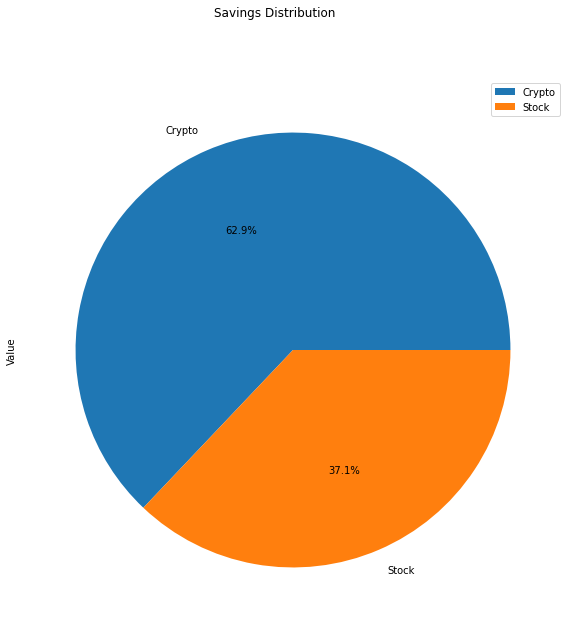

In [15]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(subplots=True,autopct='%1.1f%%' ,figsize=(20,10),title="Savings Distribution");

In [16]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings=df_savings.loc["Crypto","Value"] + df_savings.loc["Stock","Value"]
# Validate saving health
if total_savings > emergency_fund:
    print ("Congratulation your emergency fund is fully funded")
elif total_savings == emergency_fund:
    print ("Congratualation you have reached your emergency fund savings goal!")
else:
    print(f" You need to save {emergency_fund-total_savings} to reach your emergency fund savings goal")
# YOUR CODE HERE!

Congratulation your emergency fund is fully funded


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [17]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [18]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
start_date = pd.Timestamp("2017-04-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-04-01", tz="America/New_York").isoformat()

df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=3000
).df
AGG = df_stock_data[df_stock_data["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = df_stock_data[df_stock_data["symbol"]=="SPY"].drop("symbol", axis=1)
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=["AGG","SPY"])
# Display sample data
df_stock_data

AGG                                       \
                             open      high      low   close    volume   
timestamp                                                                
2017-04-03 04:00:00+00:00  108.31  108.6800  108.300  108.67   5198006   
2017-04-04 04:00:00+00:00  108.61  108.6500  108.520  108.57   1627492   
2017-04-05 04:00:00+00:00  108.48  108.7400  108.453  108.69   2304074   
2017-04-06 04:00:00+00:00  108.64  108.7100  108.480  108.68   1725301   
2017-04-07 04:00:00+00:00  108.80  108.8900  108.420  108.44   1783599   
...                           ...       ...      ...     ...       ...   
2022-03-28 04:00:00+00:00  106.25  106.5252  106.160  106.36   8540551   
2022-03-29 04:00:00+00:00  106.61  106.8900  106.455  106.86  11396549   
2022-03-30 04:00:00+00:00  106.60  107.1500  106.590  107.15  11544378   
2022-03-31 04:00:00+00:00  107.19  107.3800  107.060  107.10  13788220   
2022-04-01 04:00:00+00:00  106.35  106.9500  106.250  106.75  11579091   

                                                      SPY                    \
                          trade_count        vwap    open     high      low   
timestamp                                                                     
2017-04-03 04:00:00+00:00       15992  108.605513  235.79  236.030  233.910   
2017-04-04 04:00:00+00:00        8325  108.591265  235.00  235.580  234.555   
2017-04-05 04:00:00+00:00       11167  108.599103  236.26  237.390  234.540   
2017-04-06 04:00:00+00:00        7746  108.588276  234.96  236.040  234.425   
2017-04-07 04:00:00+00:00        8534  108.645684  235.18  236.000  234.640   
...                               ...         ...     ...      ...      ...   
2022-03-28 04:00:00+00:00       27246  106.295912  452.05  455.910  450.060   
2022-03-29 04:00:00+00:00       33651  106.734051  460.07  462.070  457.180   
2022-03-30 04:00:00+00:00       24975  107.007713  460.29  461.195  456.465   
2022-03-31 04:00:00+00:00       44817  107.229272  457.92  458.760  451.160   
2022-04-01 04:00:00+00:00       40126  106.667931  453.30  453.460  449.140   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2017-04-03 04:00:00+00:00  235.33   85546486      278486  235.194832  
2017-04-04 04:00:00+00:00  235.48   56466195      192579  235.237449  
2017-04-05 04:00:00+00:00  234.78  108800604      363080  235.933657  
2017-04-06 04:00:00+00:00  235.44   69135757      244996  235.287745  
2017-04-07 04:00:00+00:00  235.20   74412311      235941  235.290964  
...                           ...        ...         ...         ...  
2022-03-28 04:00:00+00:00  455.84   68744767      624225  453.296491  
2022-03-29 04:00:00+00:00  461.53   86682895      738526  459.632992  
2022-03-30 04:00:00+00:00  458.79   79668682      659199  459.158702  
2022-03-31 04:00:00+00:00  452.11  118607132      751169  455.444107  
2022-04-01 04:00:00+00:00  452.92   88676014      624745  451.850848  

[1260 rows x 14 columns]

In [19]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# Set number of simulations
num_sims = 1000

# Configure a Monte Carlo simulation to forecast three years daily returns
MC_Portfolio30yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights=[.4,.6],
    num_simulation = num_sims,
    num_trading_days = 252*30
)


In [20]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_Portfolio30yr.portfolio_data.head()

AGG                                    \
                             open    high      low   close   volume   
timestamp                                                             
2017-04-03 04:00:00+00:00  108.31  108.68  108.300  108.67  5198006   
2017-04-04 04:00:00+00:00  108.61  108.65  108.520  108.57  1627492   
2017-04-05 04:00:00+00:00  108.48  108.74  108.453  108.69  2304074   
2017-04-06 04:00:00+00:00  108.64  108.71  108.480  108.68  1725301   
2017-04-07 04:00:00+00:00  108.80  108.89  108.420  108.44  1783599   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-04-03 04:00:00+00:00       15992  108.605513          NaN  235.79   
2017-04-04 04:00:00+00:00        8325  108.591265    -0.000920  235.00   
2017-04-05 04:00:00+00:00       11167  108.599103     0.001105  236.26   
2017-04-06 04:00:00+00:00        7746  108.588276    -0.000092  234.96   
2017-04-07 04:00:00+00:00        8534  108.645684    -0.002208  235.18   

                                                                           \
                             high      low   close     volume trade_count   
timestamp                                                                   
2017-04-03 04:00:00+00:00  236.03  233.910  235.33   85546486      278486   
2017-04-04 04:00:00+00:00  235.58  234.555  235.48   56466195      192579   
2017-04-05 04:00:00+00:00  237.39  234.540  234.78  108800604      363080   
2017-04-06 04:00:00+00:00  236.04  234.425  235.44   69135757      244996   
2017-04-07 04:00:00+00:00  236.00  234.640  235.20   74412311      235941   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-04-03 04:00:00+00:00  235.194832          NaN  
2017-04-04 04:00:00+00:00  235.237449     0.000637  
2017-04-05 04:00:00+00:00  235.933657    -0.002973  
2017-04-06 04:00:00+00:00  235.287745     0.002811  
2017-04-07 04:00:00+00:00  235.290964    -0.001019

In [21]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_Portfolio30yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008628,0.999824,0.999173,0.997006,0.991607,1.009870,1.011386,0.996173,1.004007,0.978697,...,1.001820,1.001812,1.005846,0.998852,1.008603,0.996806,0.994106,1.002128,1.006074,1.021024
2,1.010049,0.997958,0.999060,1.007942,0.993766,0.994056,1.020672,1.010170,1.005210,0.977909,...,0.984882,0.996969,1.004896,0.995367,1.014279,1.006597,0.993274,1.002170,1.002977,1.029236
3,1.011887,0.988214,1.001070,0.992826,1.003963,0.991501,1.021028,1.013552,0.998740,0.985357,...,0.980900,0.991448,1.006215,0.993326,1.013330,1.010466,0.992658,1.004162,1.011920,1.046629
4,1.019722,0.983117,1.011589,0.995957,1.006580,0.981969,1.022668,1.003927,0.986865,0.982608,...,0.979105,0.984389,1.008482,0.988785,0.994502,1.009865,0.997503,1.009487,0.999852,1.047544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,15.360372,6.393140,12.896527,4.753754,14.250470,5.140650,33.450143,8.896220,3.470058,4.318102,...,5.090508,11.934109,36.012425,5.267522,21.012841,8.371543,8.389568,13.002246,5.535609,39.992317
7557,15.375697,6.363022,12.976174,4.776991,14.151513,5.087095,33.820181,8.926873,3.465267,4.310882,...,5.024927,11.935409,36.220149,5.274149,20.965597,8.464757,8.388593,12.823780,5.565916,40.111832
7558,15.369950,6.363775,12.919394,4.782092,13.822145,5.006142,33.559331,8.931062,3.443187,4.269605,...,4.990257,12.076606,36.416922,5.318400,20.789924,8.496472,8.405038,12.846386,5.531288,40.340548
7559,15.132659,6.321178,12.937654,4.759336,13.758790,5.007149,33.629826,8.965143,3.451142,4.259125,...,5.041497,11.980755,36.348577,5.287342,20.891915,8.535185,8.471700,12.902281,5.537743,40.656861


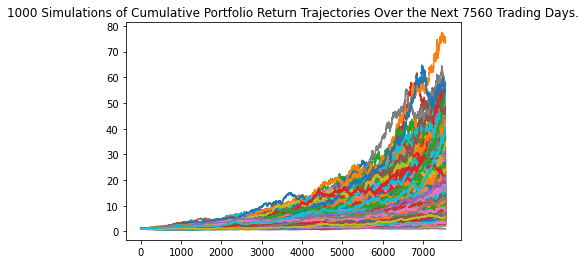

In [22]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_Portfolio30yr.plot_simulation()

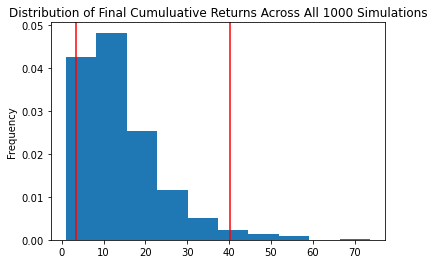

In [23]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_Portfolio30yr.plot_distribution()

### Retirement Analysis

In [24]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
portfolio_tbl = MC_Portfolio30yr.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(portfolio_tbl)

count           1000.000000
mean              14.345995
std                9.676154
min                0.975899
25%                7.241060
50%               12.028131
75%               18.184923
max               73.735180
95% CI Lower       3.347055
95% CI Upper      40.318954
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [25]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(portfolio_tbl[8]*initial_investment,2)
ci_upper = round(portfolio_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $66941.1 and $806379.08


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [26]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(portfolio_tbl[8]*initial_investment,2)
ci_upper = round(portfolio_tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $100411.65 and $1209568.62


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [27]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_five_year= MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation = num_sims,
    num_trading_days = 252*5
)

In [28]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006903,1.013831,1.011958,1.001013,1.020585,0.984707,1.006341,1.015020,0.997985,0.992635,...,1.005135,1.021753,0.997970,0.982093,1.018660,1.000730,1.001320,0.979630,0.986920,1.013076
2,0.996698,1.013872,1.027082,0.987781,1.033032,0.975383,1.013032,1.017110,0.992149,1.000203,...,0.995021,1.030639,0.976833,0.990882,1.024287,0.997762,0.983477,0.982186,0.990813,1.005375
3,0.991456,1.020989,1.043346,0.997925,1.039144,0.961793,1.012483,1.017324,0.994507,1.001865,...,0.996900,1.020562,0.984741,0.985568,1.011206,0.996385,0.992777,0.972795,0.986524,1.010080
4,0.990980,1.018129,1.039585,1.001074,1.038110,0.966759,1.005769,1.009940,0.982678,0.989571,...,0.994610,1.017039,0.986916,1.000988,1.016110,0.989222,0.999025,0.973690,0.988488,0.997048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.080025,1.527786,2.323307,1.946190,1.196972,1.692818,1.758327,1.305478,2.770055,0.812730,...,3.330780,1.068247,2.338752,4.823669,1.049146,1.717731,1.741895,1.596015,1.060999,1.583407
1257,2.050911,1.527050,2.331555,1.913569,1.205345,1.683026,1.724299,1.331328,2.799174,0.811212,...,3.324907,1.087816,2.334334,4.865414,1.053080,1.722585,1.724983,1.594291,1.066580,1.594192
1258,2.078384,1.541028,2.347222,1.910357,1.222244,1.653352,1.740253,1.321682,2.785635,0.796461,...,3.343903,1.095405,2.340310,4.891038,1.041105,1.745012,1.725861,1.601084,1.087640,1.604790
1259,2.095264,1.540820,2.385602,1.896755,1.207535,1.673957,1.738945,1.308523,2.767236,0.801627,...,3.308874,1.107308,2.342817,4.991067,1.053784,1.746355,1.733188,1.603872,1.084628,1.609155


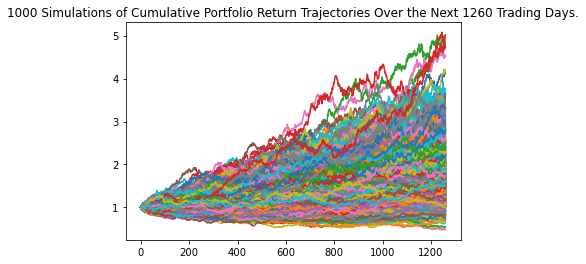

In [29]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_five_year.plot_simulation()

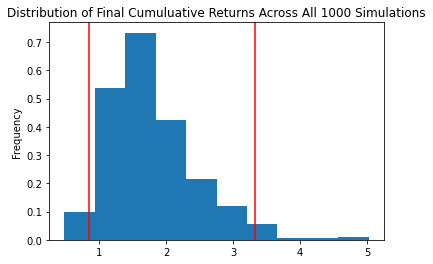

In [30]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_five_year.plot_distribution()

In [31]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
portfolio_five_year_tbl = MC_five_year.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(portfolio_five_year_tbl)

count           1000.000000
mean               1.782410
std                0.642621
min                0.480964
25%                1.330576
50%                1.657450
75%                2.096476
max                5.021206
95% CI Lower       0.850706
95% CI Upper       3.323176
Name: 1260, dtype: float64


In [32]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 650000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(portfolio_five_year_tbl[8]*initial_investment,2)
ci_upper_five = round(portfolio_five_year_tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $650000 in the portfolio over the next 5 years will end within in the range of $552958.64 and $2160064.23


### Ten Years Retirement Option

In [33]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation = num_sims,
    num_trading_days = 252*10
)

In [34]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998367,0.987968,0.999877,0.986690,1.004792,0.997835,0.998977,0.991537,0.999918,1.007610,...,1.004201,1.009866,1.002009,1.002367,1.025025,1.001519,1.005936,1.004804,0.996368,1.000561
2,1.009223,0.998520,0.981178,0.989599,0.993526,0.988301,0.995126,0.986203,0.980318,1.015840,...,1.004864,0.997301,1.008525,0.996155,1.036100,0.999465,0.999257,1.027286,1.011920,1.000294
3,1.007309,1.002056,0.975594,1.002868,0.982970,0.992868,0.990597,0.983594,0.983603,1.013460,...,0.986805,0.989064,1.024894,0.997119,1.043875,0.992659,0.994269,1.037020,1.021031,0.996687
4,0.994955,0.996328,0.968877,1.007594,0.983622,0.999396,1.012399,0.981955,0.982773,1.011493,...,0.986196,0.974177,1.046168,1.010185,1.060510,0.971766,0.994706,1.028995,1.024333,0.995712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,8.003540,1.417905,1.812696,3.912223,2.808706,6.432061,3.337675,2.930464,2.869368,1.604805,...,2.975271,2.516039,3.439030,2.991264,3.842477,5.804077,2.249241,2.358531,1.706505,1.420148
2517,7.930833,1.423123,1.821426,3.929573,2.834935,6.338361,3.292888,2.919782,2.864068,1.627852,...,2.950342,2.499647,3.430693,3.008936,3.781518,5.844903,2.261080,2.365682,1.727522,1.422216
2518,7.974439,1.424651,1.833442,3.891079,2.823165,6.276449,3.335819,2.930472,2.822157,1.671430,...,2.992349,2.489488,3.445428,3.012014,3.686178,5.838111,2.299416,2.369364,1.699605,1.401426
2519,7.889047,1.435300,1.804902,3.888080,2.853873,6.355141,3.369534,2.925323,2.822727,1.705450,...,2.994895,2.477173,3.395747,3.036695,3.704076,5.850677,2.237561,2.361947,1.687422,1.410266


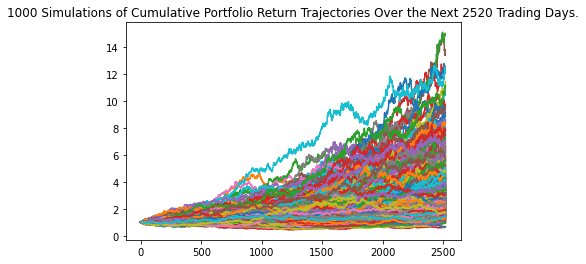

In [35]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_ten_year.plot_simulation()

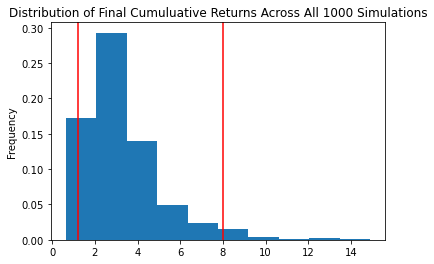

In [36]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_ten_year.plot_distribution()

In [37]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
portfolio_ten_year_tbl = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(portfolio_ten_year_tbl)

count           1000.000000
mean               3.293190
std                1.797462
min                0.639553
25%                2.079568
50%                2.852798
75%                3.977094
max               14.900704
95% CI Lower       1.190151
95% CI Upper       7.985031
Name: 2520, dtype: float64


In [38]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 650000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(portfolio_ten_year_tbl[8]*initial_investment,2)
ci_upper_ten = round(portfolio_ten_year_tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $650000 in the portfolio over the next 10 years will end within in the range of $773598.38 and $5190270.06
